In [1]:
import random
def init(Nx = 20, Ny = 20):
    C = [[0 for j in range(Nx+2)] for i in range (Ny+2)]
    for i in range (1, Ny+1):
      for j in range(1, Nx+1):
        C[i][j] = random.randint(0,1)
    return C

In [2]:
import matplotlib.pyplot as plt
def plot(C):
    plt.imshow(C, cmap="gray")
    plt.axis("off")
    plt.show()


In [5]:
def iter(C):
    Ny, Nx = len(C) - 2, len(C[0]) - 2
    C2 = [[0 for j in range(Nx+2)] for i in range (Ny+2)]
    for i in range(1, Ny+1):
        for j in range(1, Nx+1):
            c = C[i][j]
            V = C[i][j+1] + C[i][j-1] + C[i+1][j] + C[i-1][j] + \
                C[i+1][j+1] + C[i+1][j-1] + C[i-1][j-1] + C[i-1][j+1]
            if c == 0:
                if V == 3:
                    C2[i][j] = 1
                else: 
                    C2[i][j] = 0
            else:
                if V == 2 or V == 3:
                       C2[i][j] = 1
                else: 
                    C2[i][j] = 0

    for i in range (1, Ny+1):
        for j in range(1, Nx+1):
            C[i][j] = C2[i][j]
    return C2

def game(C0, MAX_IT = 10):
    count = 0
    Cs = [C0]
    while count < MAX_IT:
        C = iter(C0)
        Cs.append(C)
        C0 = C
        count += 1
    return Cs

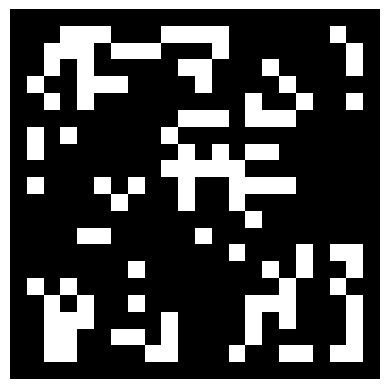

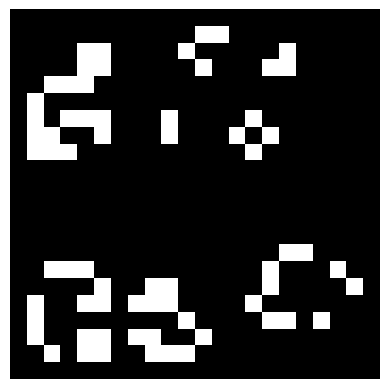

In [6]:
C = init()
Cs = game(C)
plot(Cs[0])
plot(Cs[-1])

In [8]:
from matplotlib import animation, rc
rc("animation", html="html5")

def update(i):
    ax.clear()
    ax.imshow(Cs[i], cmap="gray")
    ax.axis("off")
    return ax

C = init()
Cs = game(C)
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(Cs), interval=100)
plt.close()

anim

RuntimeError: Requested MovieWriter (ffmpeg) not available